# Dataset Exploration and Preprocessing

In this notebook we perform an Exporatory Data Analysis of the Kaggle Sticker Sales Dataset. The main purpose of this notebook is to provide relevant insights on our data that will later guide our feature engineering and modelling strategies. We also perform some initial cleaning, such as getting rid of some columns and treating missing values.

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import holidays
import numpy as np

## Initial Exploration

In [19]:
df = pd.read_csv("data/stickers/train.csv")
df.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


- The id column doesen't provide useful information.
- We can transform the date column into pandas datetime format for easier processing.
- num_sold is the objective variable we eant to predict. Its Dtype (float) is correct.
- The rest of the columns: country, store and product seem to be categorical features.

In [21]:
df.drop(columns=["id"], inplace=True) # get rid of the id column
df["date"] = pd.to_datetime(df["date"]) # transform to appropriate datetime format

In summary, our feature vector is initially formed by the following variables: country, store, product and date. This are the available features to predict our objective variable y: num_sold.

In other words, our main goal is to forcast the total sales for a sticker product in a specific date, store and country.

## Categorical Variables

In [22]:
df['country'].value_counts()

country
Canada       38355
Finland      38355
Italy        38355
Kenya        38355
Norway       38355
Singapore    38355
Name: count, dtype: int64

In [23]:
df['product'].value_counts()

product
Holographic Goose     46026
Kaggle                46026
Kaggle Tiers          46026
Kerneler              46026
Kerneler Dark Mode    46026
Name: count, dtype: int64

In [24]:
df['store'].value_counts()

store
Discount Stickers       76710
Stickers for Less       76710
Premium Sticker Mart    76710
Name: count, dtype: int64

In [25]:
df[["store","product","country"]].value_counts()

store              product             country  
Discount Stickers  Holographic Goose   Canada       2557
Stickers for Less  Kaggle              Finland      2557
                   Holographic Goose   Singapore    2557
                                       Norway       2557
                                       Kenya        2557
                                                    ... 
Discount Stickers  Kerneler Dark Mode  Norway       2557
                                       Kenya        2557
                                       Italy        2557
                                       Finland      2557
Stickers for Less  Kerneler Dark Mode  Singapore    2557
Name: count, Length: 90, dtype: int64

In [34]:
df[["store","product","country"]].value_counts().unique()

array([2557], dtype=int64)

Note that we have the same amount of samples for each combination of store, product and country. We have no more than 6 possible values for each category.

## Missing Values

In [26]:
df.isna().sum()/len(df)

date        0.000000
country     0.000000
store       0.000000
product     0.000000
num_sold    0.038548
dtype: float64

3% of the data is missing in the target variables.

In [39]:
df[df["num_sold"].isna()].groupby(["store", "country", "product"]).size()

store                 country  product           
Discount Stickers     Canada   Holographic Goose     2557
                               Kerneler                 1
                      Kenya    Holographic Goose     2557
                               Kerneler                63
                               Kerneler Dark Mode       1
Premium Sticker Mart  Canada   Holographic Goose      380
                      Kenya    Holographic Goose      646
Stickers for Less     Canada   Holographic Goose     1308
                      Kenya    Holographic Goose     1358
dtype: int64

Missing Not At Random, at first glance high correlation with Holographic Goose product and Canada and Kenya.

explicación??

date??

C:\Users\rjvil\AppData\Local\Temp\ipykernel_29480\514793336.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan["is_na"]=df_nan["num_sold"].isna()


Text(0.5, 0.98, 'Missing Values Patterns in Kenya and Canada for Holographic Goose')

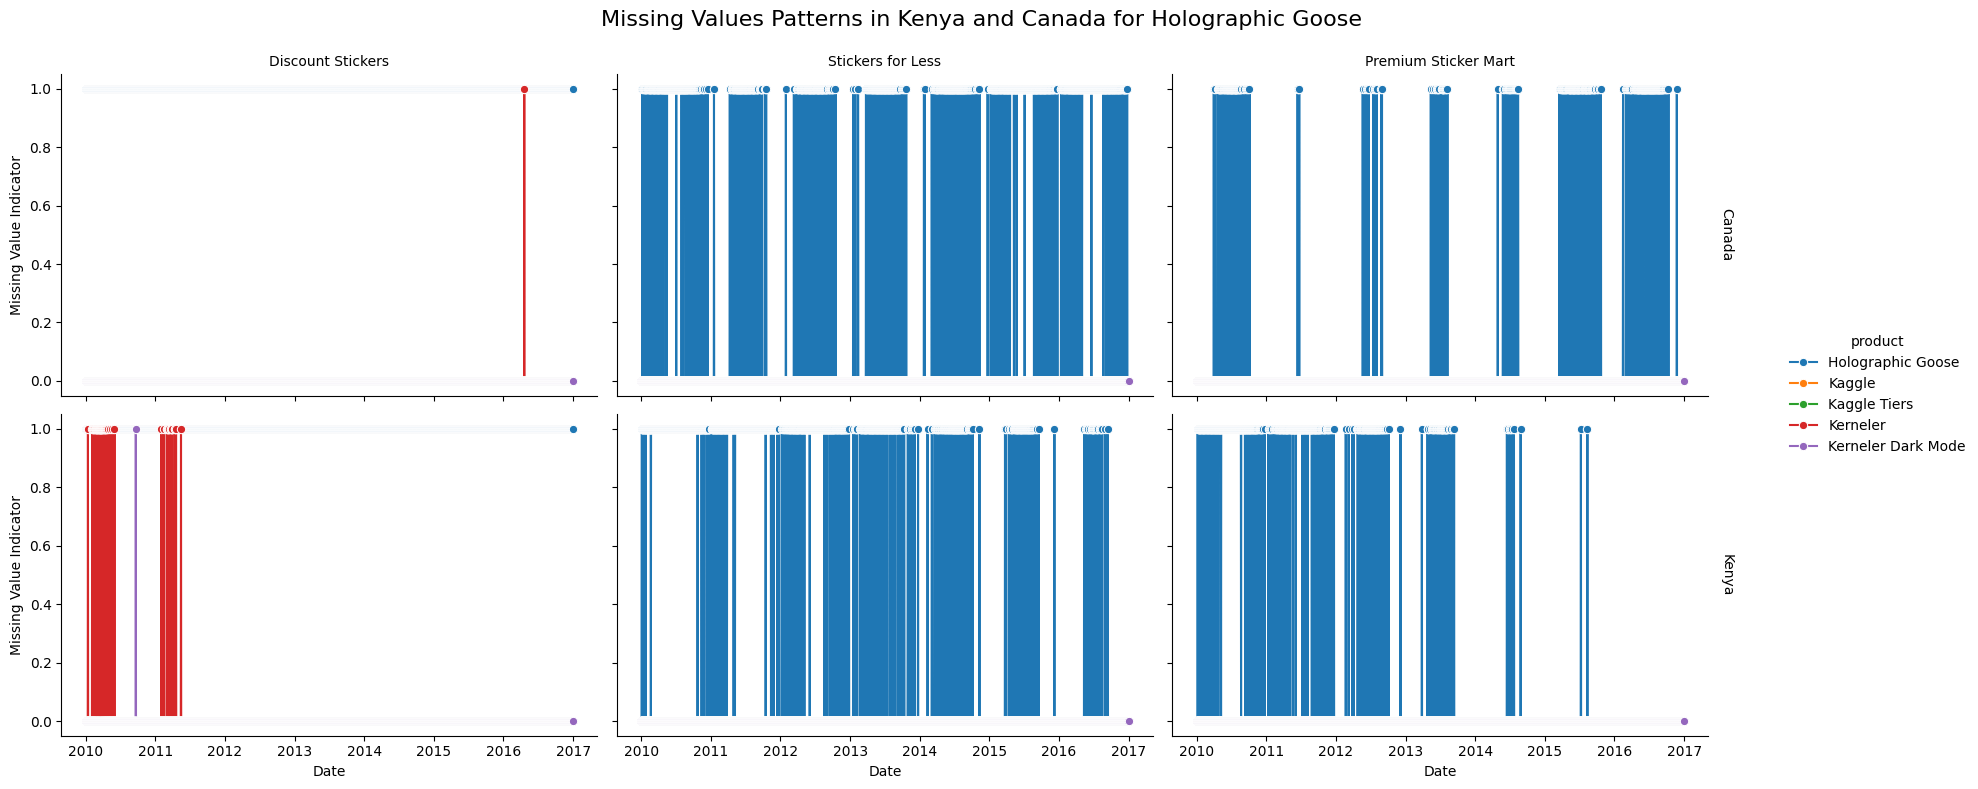

In [52]:
# nos centramos primero solo en kenya y canada y holographic goose
df_nan=df[df["country"].isin(["Canada","Kenya"])]
df_nan["is_na"]=df_nan["num_sold"].isna()

g = sns.FacetGrid(df_nan, row="country", col="store", hue="product", margin_titles=True, height=4, aspect=1.5)
g.map(sns.lineplot, "date", "is_na", marker="o")
g.add_legend()
g.set_axis_labels("Date", "Missing Value Indicator")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Missing Values Patterns in Kenya and Canada for Holographic Goose', fontsize=16)

## Target Variable

time series notion, sales might be correlated with previous sales and temporal features

## Time features

## Correlation